In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../평균_표준편차.xlsx', sheet_name=3, header=None)
df.drop(columns=[0], inplace=True)

cluster = ['군집0', '군집1', '군집2', '군집3']
sectors = list(pd.unique(df[2]))

df.loc[df[1] == 66588, 1] = np.nan
df.loc[df[1] == 32788, 1] = np.nan
df.loc[df[1] == 7548, 1] = np.nan
df.loc[df[1] == 53096, 1] = np.nan

df = df.fillna(method='ffill')

df = df.astype({5:'string'})
df.info()

df[6] = df[2] + '_risky_' + df[5]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       72 non-null     object 
 1   2       72 non-null     object 
 2   3       72 non-null     int64  
 3   4       72 non-null     float64
 4   5       72 non-null     string 
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 2.9+ KB


,1,2,3,4,5,6
0,군집0,개인 서비스업,8524,0.128011,0,개인 서비스업_risky_0
1,군집0,개인 서비스업,3084,0.046315,1,개인 서비스업_risky_1
2,군집0,건강/의료 서비스업,4760,0.071484,0,건강/의료 서비스업_risky_0
3,군집0,건강/의료 서비스업,1528,0.022947,1,건강/의료 서비스업_risky_1
4,군집0,교육서비스업,1336,0.020064,0,교육서비스업_risky_0
...,...,...,...,...,...,...
67,군집3,카페,1716,0.032319,1,카페_risky_1
68,군집3,패스트푸드,360,0.006780,0,패스트푸드_risky_0
69,군집3,패스트푸드,52,0.000979,1,패스트푸드_risky_1
70,군집3,한식,16536,0.311436,0,한식_risky_0


In [37]:
def visualize(cluster_group):
    cluster = df.loc[(df[1] == cluster_group)]
    palette = sns.color_palette("pastel")
    plt.rc('font', family='Malgun Gothic')
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(50, 30))
    
    plt.subplot(1,3,1)
    sizes = cluster[3]
    labels = cluster[6]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 전체')
    
    plt.subplot(1,3,2)
    sizes = cluster.loc[df[5] == '0'][3]
    labels = cluster.loc[df[5] == '0'][2]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 비 경영위기')
    
    plt.subplot(1,3,3)
    sizes = cluster.loc[df[5] == '1'][3]
    labels = cluster.loc[df[5] == '1'][2]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 경영위기')
    
    plt.tight_layout()
    
    dir_path = f'./업종_중분류_시각화'
    
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    plt.savefig(f'./업종_중분류_시각화/{cluster_group}의 업종별 분포.png')
    
    plt.show()    
    

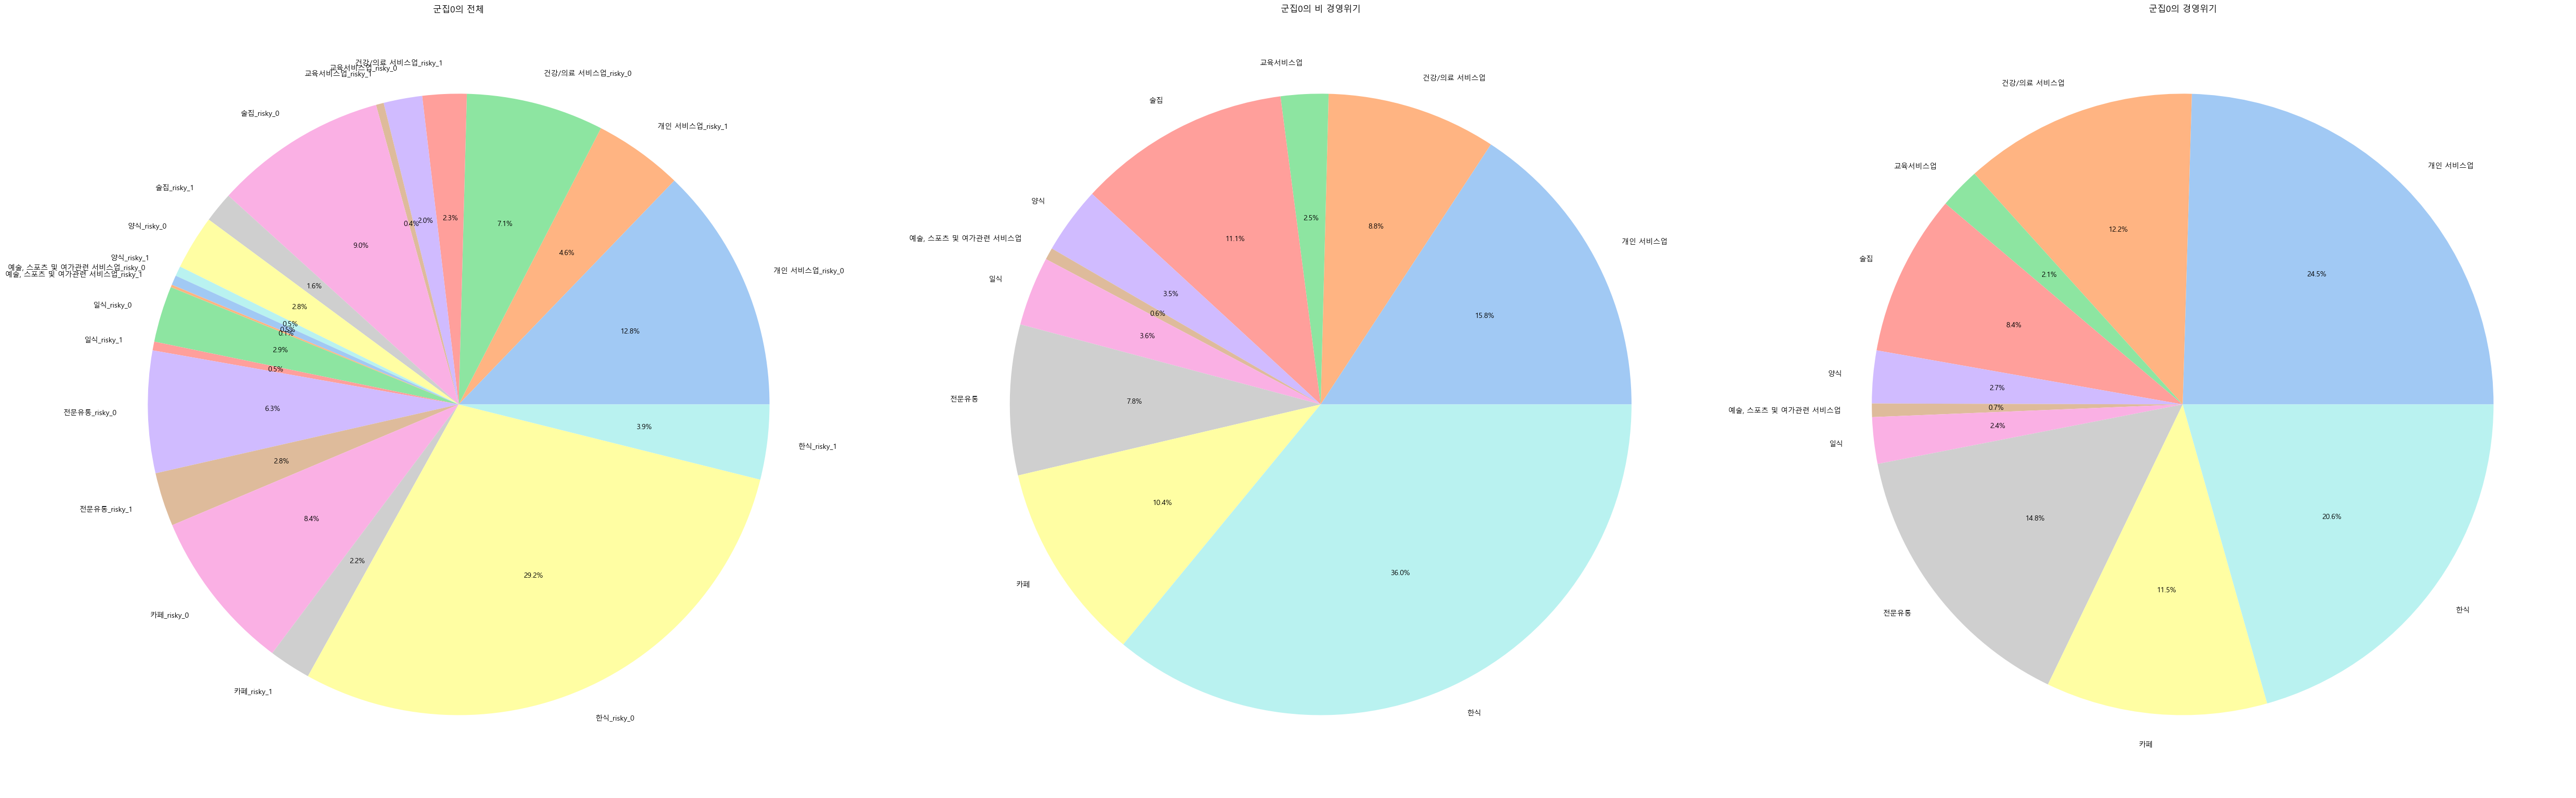

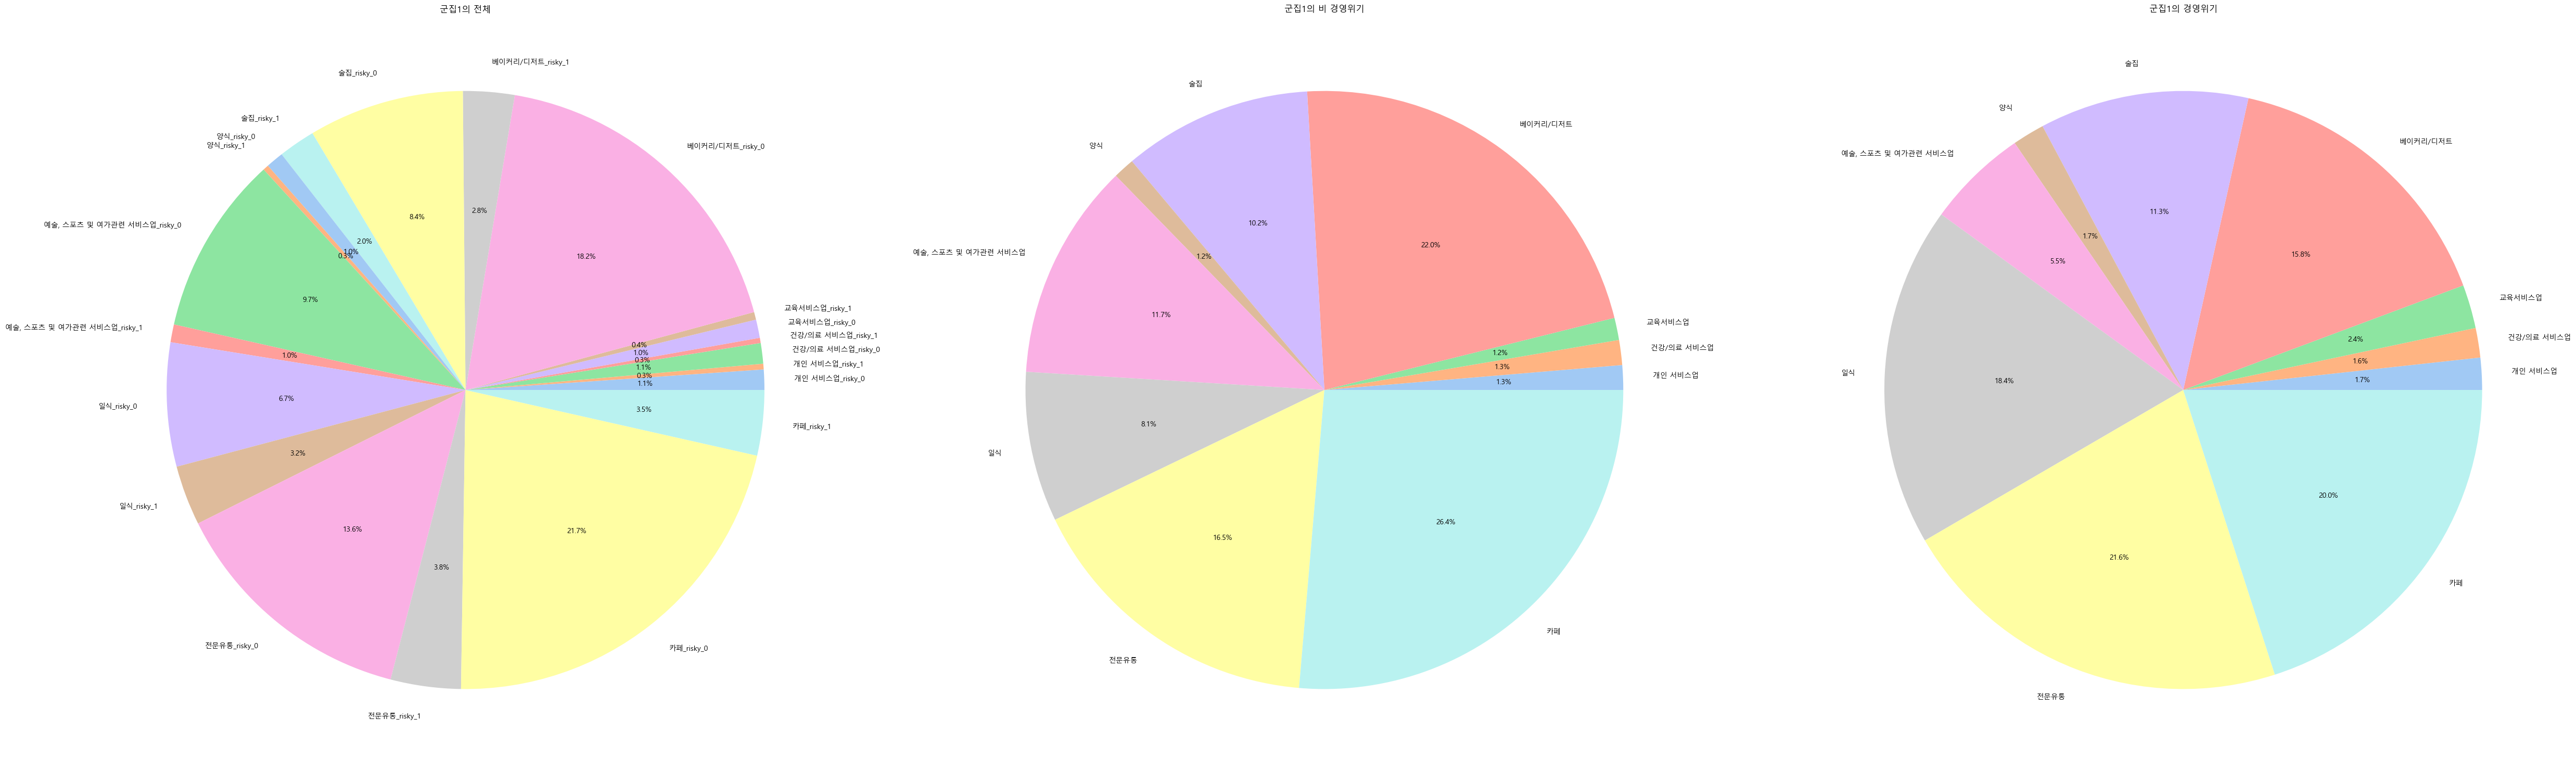

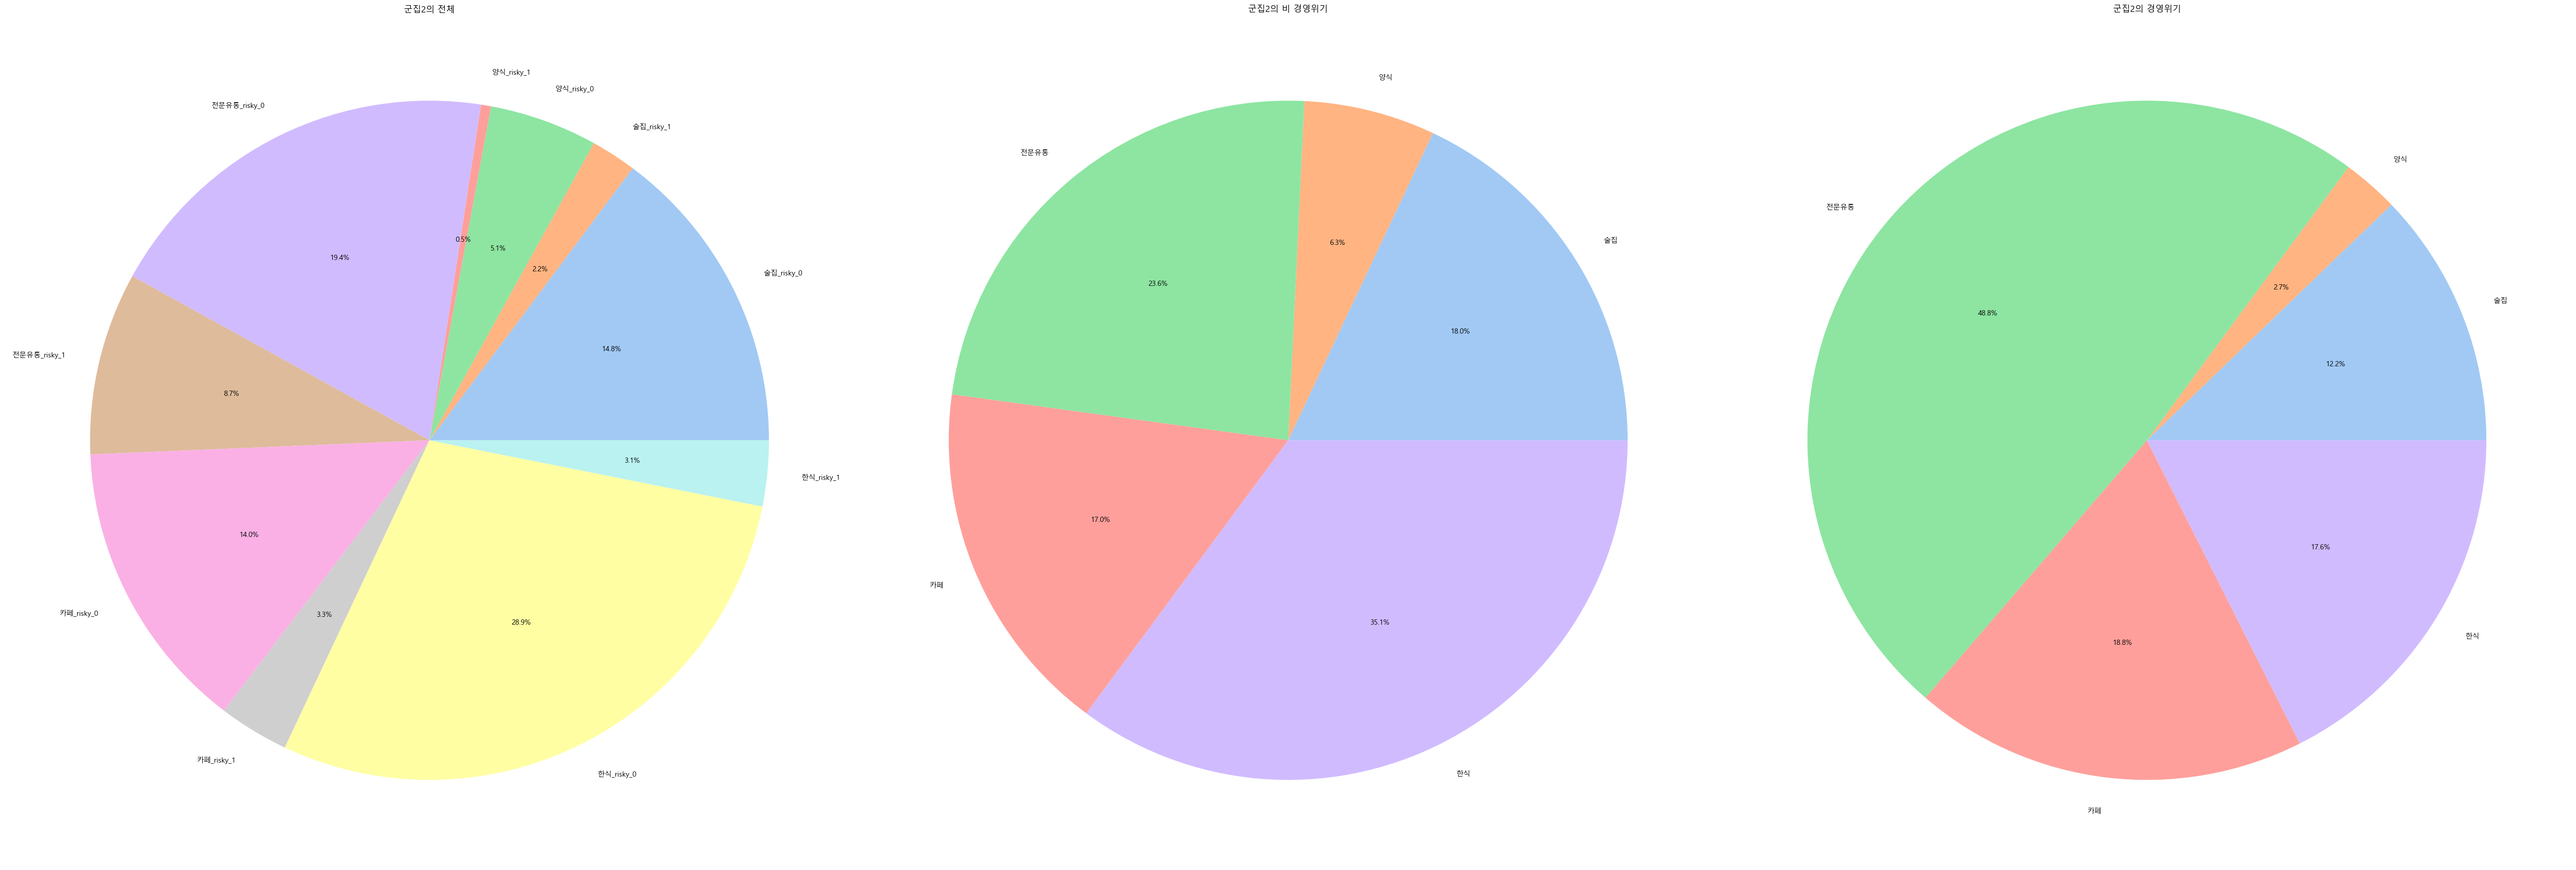

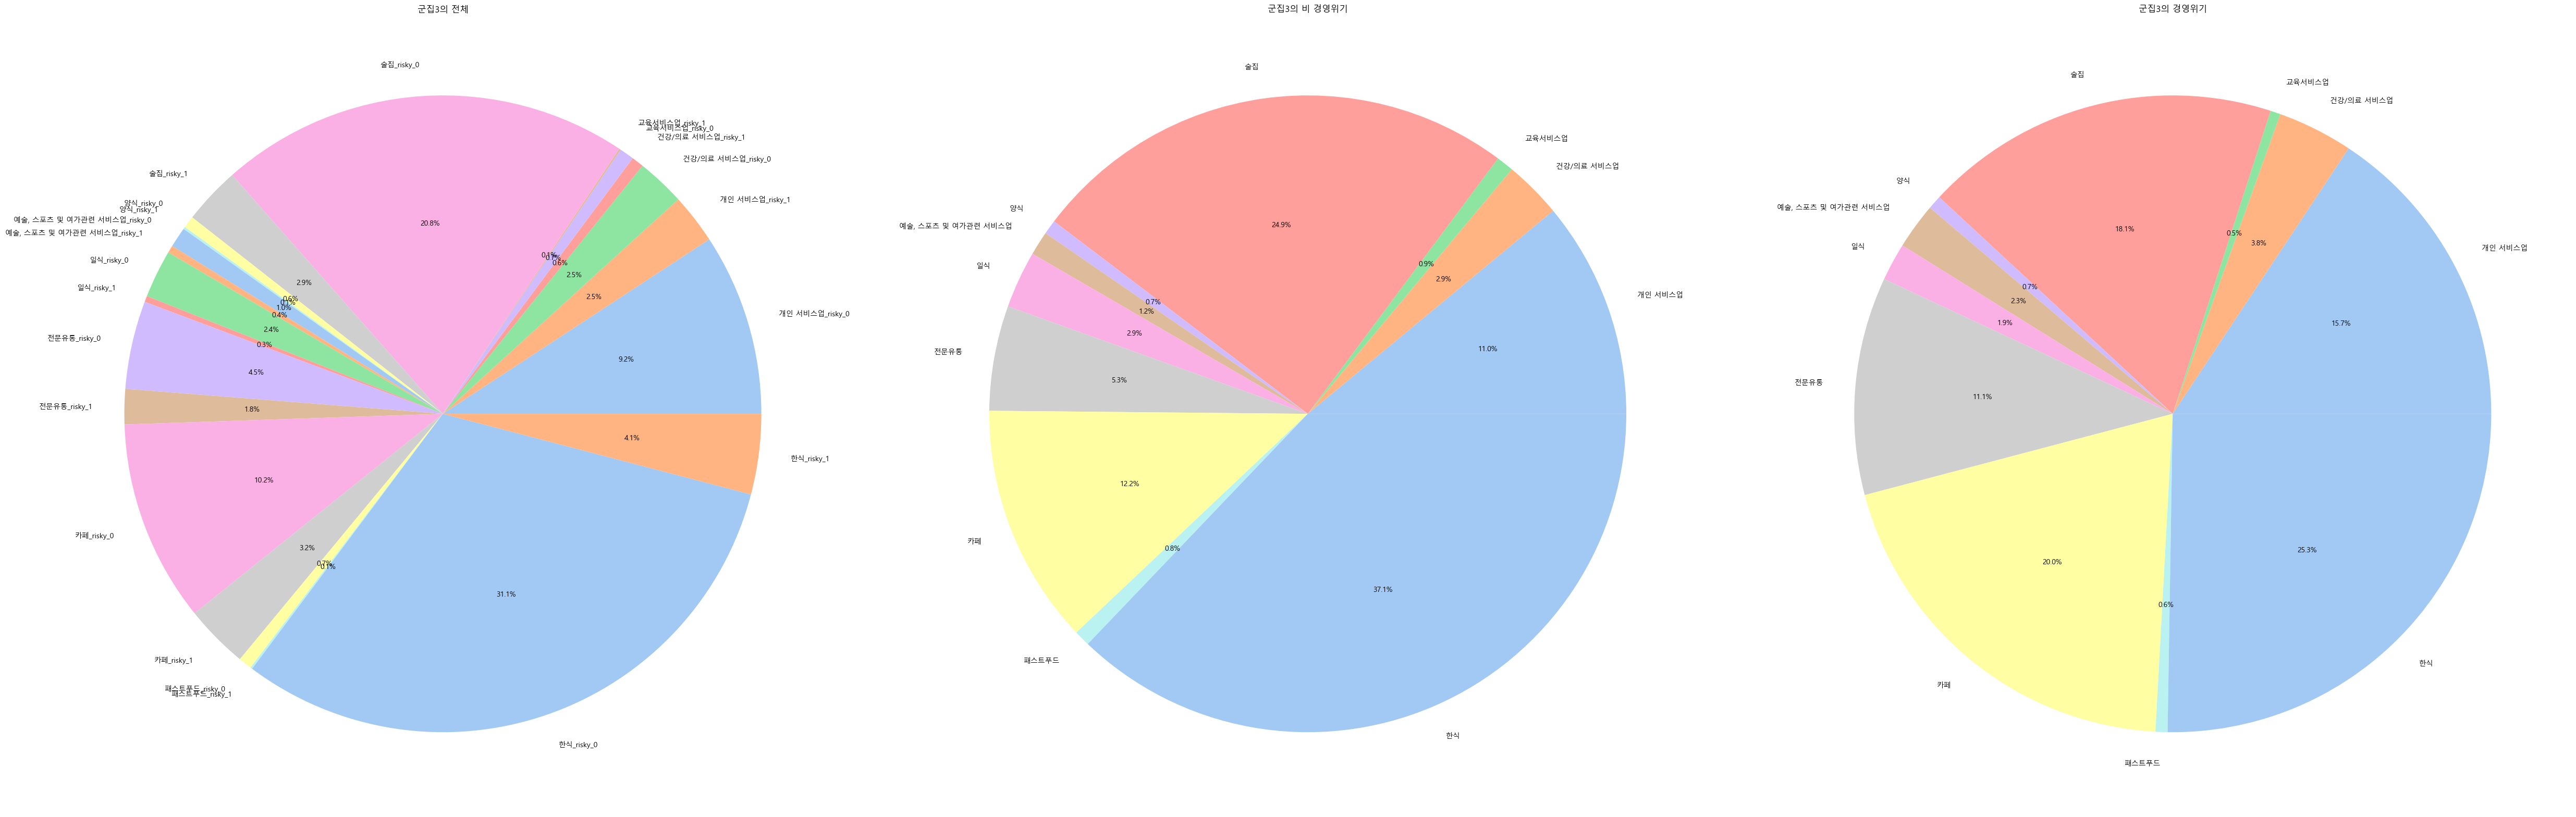

In [38]:
clusters = ['군집0', '군집1', '군집2', '군집3']

for cluster in clusters:
    visualize(cluster)